## S12 T01 Pipelines, grid search i text mining Tasca
### Machine learning avançat
#### Eloi Canals

- Nivell 1, Exercici 1
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [1]:
# Imports i carrega de dades
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn import datasets

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
#train and test
X = df.drop(['target'],axis=1)
y = df['target']
#train 70%, test 30%, test_size is the percentage and random_state is for initilizing random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Definim els steps del pipeline
steps = [('scaler', StandardScaler()), ('RF', RandomForestRegressor())]
# pipeline instance
pipeline = Pipeline(steps)

In [8]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [9]:
# grid: cross validation model
# params = {'RF__n_estimators':[10,20,30,40,50,100], 'RF__max_depth':[1,5,10]}
params = {'RF__n_estimators':[10,20,30,40,50,100], 'RF__max_depth':[1,5,10]}
grid = GridSearchCV(pipeline, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RF', RandomForestRegressor())]),
             param_grid={'RF__max_depth': [1, 5, 10],
                         'RF__n_estimators': [10, 20, 30, 40, 50, 100]})

In [10]:
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.49
{'RF__max_depth': 5, 'RF__n_estimators': 30}


- Nivell 1, Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [23]:
# importació llibreries
import nltk

In [24]:
# Importació text en anglès
# Per fer l'exercici s'ha seleccionat el discurs d'Steve Jobs al inici de curs de la universitat d'stanford el June 12, 2005.
# https://news.stanford.edu/2005/06/14/jobs-061505/

f = open('JobsSpeech.txt','r')
jobs = f.read()
f.close()

In [25]:
# Substitució dels salts de linea per espais.
jobs.count('\n')

52

In [26]:
import re
jobs = re.sub('\n', ' ', jobs)

In [27]:
jobs.count('\n')

0

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ecanals/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# Sentence Tokenization
from nltk.tokenize import sent_tokenize
tokenized_jobs = sent_tokenize(jobs)
print(tokenized_jobs)

['I am honored to be with you today at your commencement from one of the finest universities in the world.', 'I never graduated from college.', 'Truth be told, this is the closest I’ve ever gotten to a college graduation.', 'Today I want to tell you three stories from my life.', 'That’s it.', 'No big deal.', 'Just three stories.', 'The first story is about connecting the dots.', 'I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit.', 'So why did I drop out?', 'It started before I was born.', 'My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption.', 'She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife.', 'Except that when I popped out they decided at the last minute that they really wanted a girl.', 'So my parents, who were on a waiting list, got a 

In [32]:
# Word Tokenization
from nltk.tokenize import word_tokenize
jobs_words=word_tokenize(jobs)
print(jobs_words)

['I', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', '.', 'I', 'never', 'graduated', 'from', 'college', '.', 'Truth', 'be', 'told', ',', 'this', 'is', 'the', 'closest', 'I', '’', 've', 'ever', 'gotten', 'to', 'a', 'college', 'graduation', '.', 'Today', 'I', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', '.', 'That', '’', 's', 'it', '.', 'No', 'big', 'deal', '.', 'Just', 'three', 'stories', '.', 'The', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', '.', 'I', 'dropped', 'out', 'of', 'Reed', 'College', 'after', 'the', 'first', '6', 'months', ',', 'but', 'then', 'stayed', 'around', 'as', 'a', 'drop-in', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'I', 'really', 'quit', '.', 'So', 'why', 'did', 'I', 'drop', 'out', '?', 'It', 'started', 'before', 'I', 'was', 'born', '.', 'My', 'biological', 'mother', 'was', 'a', 'young', ',', 'unwe

In [47]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(jobs_words)
print(fdist)

<FreqDist with 755 samples and 2603 outcomes>


In [48]:
# eliminem signes de puntuaci´p
fdist.pop('.')
fdist.pop(',')

100

In [49]:
# Frequency most commun words
fdist.most_common(15)

[('I', 93),
 ('the', 91),
 ('to', 71),
 ('and', 49),
 ('was', 48),
 ('a', 46),
 ('’', 43),
 ('of', 40),
 ('that', 38),
 ('it', 37),
 ('in', 33),
 ('you', 32),
 ('is', 29),
 ('my', 25),
 ('had', 22)]

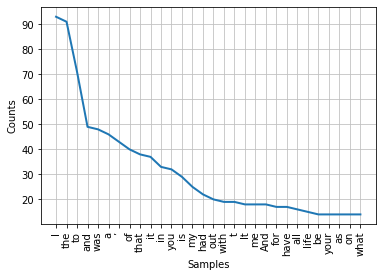

In [50]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

- Nivell 2, Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [51]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ecanals/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
filtered_sent=[]
for i in jobs_words:
    if i not in stop_words:
        filtered_sent.append(i)
print("Filterd Sentence:",filtered_sent)
print('Total: %s paraules' %len(filtered_sent))

Filterd Sentence: ['I', 'honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', '.', 'I', 'never', 'graduated', 'college', '.', 'Truth', 'told', ',', 'closest', 'I', '’', 'ever', 'gotten', 'college', 'graduation', '.', 'Today', 'I', 'want', 'tell', 'three', 'stories', 'life', '.', 'That', '’', '.', 'No', 'big', 'deal', '.', 'Just', 'three', 'stories', '.', 'The', 'first', 'story', 'connecting', 'dots', '.', 'I', 'dropped', 'Reed', 'College', 'first', '6', 'months', ',', 'stayed', 'around', 'drop-in', 'another', '18', 'months', 'I', 'really', 'quit', '.', 'So', 'I', 'drop', '?', 'It', 'started', 'I', 'born', '.', 'My', 'biological', 'mother', 'young', ',', 'unwed', 'college', 'graduate', 'student', ',', 'decided', 'put', 'adoption', '.', 'She', 'felt', 'strongly', 'I', 'adopted', 'college', 'graduates', ',', 'everything', 'set', 'adopted', 'birth', 'lawyer', 'wife', '.', 'Except', 'I', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl', '.', 'So', 'p

In [53]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [54]:
ps = PorterStemmer()

stemmed_words=[]
for i in filtered_sent:
    stemmed_words.append(ps.stem(i))

#print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['i', 'honor', 'today', 'commenc', 'one', 'finest', 'univers', 'world', '.', 'i', 'never', 'graduat', 'colleg', '.', 'truth', 'told', ',', 'closest', 'i', '’', 'ever', 'gotten', 'colleg', 'graduat', '.', 'today', 'i', 'want', 'tell', 'three', 'stori', 'life', '.', 'that', '’', '.', 'no', 'big', 'deal', '.', 'just', 'three', 'stori', '.', 'the', 'first', 'stori', 'connect', 'dot', '.', 'i', 'drop', 'reed', 'colleg', 'first', '6', 'month', ',', 'stay', 'around', 'drop-in', 'anoth', '18', 'month', 'i', 'realli', 'quit', '.', 'so', 'i', 'drop', '?', 'it', 'start', 'i', 'born', '.', 'my', 'biolog', 'mother', 'young', ',', 'unw', 'colleg', 'graduat', 'student', ',', 'decid', 'put', 'adopt', '.', 'she', 'felt', 'strongli', 'i', 'adopt', 'colleg', 'graduat', ',', 'everyth', 'set', 'adopt', 'birth', 'lawyer', 'wife', '.', 'except', 'i', 'pop', 'decid', 'last', 'minut', 'realli', 'want', 'girl', '.', 'so', 'parent', ',', 'wait', 'list', ',', 'got', 'call', 'middl', 'night', 'as

- Nivell 3, Exercici 1
Realitza sentiment analysis al teu conjunt de dades.

In [55]:
from textblob import TextBlob

In [56]:
feeling=TextBlob(jobs)

In [57]:
feeling.sentiment

Sentiment(polarity=0.18401759881659394, subjectivity=0.493435249842285)

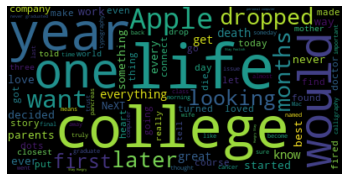

In [58]:
# Bag of words:
from wordcloud import WordCloud
textt = " ".join(review for review in filtered_sent)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Polaritat -1 - 1. Es un text en l'ambit sentimental tot i no ser una carta d'amor o similar.
- Subjectivitat. 0 - 1. Es un text clarament subjectiu ja que parla de les vivencies que va tenir durant la seva estada a Stanford.